# Classify spotify artists using an Artificial Neural Network

This guide trains a neural network model to classify spotify artists, like taylor swift and beyonce. It is adapted from [this colab](https://www.tensorflow.org/tutorials/keras/classification)

In [1]:
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Import the Spotify Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_taylor  = pd.read_csv("/content/drive/MyDrive/python_scratch/spotify_data/taylor.csv")
df_beyonce = pd.read_csv("/content/drive/MyDrive/python_scratch/spotify_data/beyonce.csv")
df_beatles = pd.read_csv("/content/drive/MyDrive/python_scratch/spotify_data/beatles.csv")
df_nirvana = pd.read_csv("/content/drive/MyDrive/python_scratch/spotify_data/nirvana.csv")
df_rolling = pd.read_csv("/content/drive/MyDrive/python_scratch/spotify_data/rolling_stones.csv")

In [4]:
label_names = [  "Taylor Swift", "Beyonce", "The Beatles", "Nirvana",  "The Rolling Stones"]

In [5]:
df_taylor.head()

,Unnamed: 0,artist_name,artist_id,album_id,album_type,album_images,album_release_date,album_release_year,album_release_date_precision,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_id,analysis_url,time_signature,artists,available_markets,disc_number,duration_ms,explicit,track_href,is_local,track_name,track_preview_url,track_number,type,track_uri,external_urls.spotify,album_name,key_name,mode_name,key_mode
0,1,Taylor Swift,06HL4z0CvFAxyc27GXpf02,6DEjYFkNZh67HP7R9PSZvv,album,"list(height = c(640, 300, 64), url = c(""https:...",2017-11-10,2017,day,0.613,0.764,2,-6.509,1,0.1360,0.05270,0.000000,0.1970,0.4170,160.015,2yLa0QULdQr0qAIvVwN6B5,https://api.spotify.com/v1/audio-analysis/2yLa...,4,"list(href = ""https://api.spotify.com/v1/artist...","c(""AD"", ""AE"", ""AR"", ""AT"", ""AU"", ""BE"", ""BG"", ""B...",1,208186,False,https://api.spotify.com/v1/tracks/2yLa0QULdQr0...,False,...Ready For It?,NaN,1,track,spotify:track:2yLa0QULdQr0qAIvVwN6B5,https://open.spotify.com/track/2yLa0QULdQr0qAI...,reputation,D,major,D major
1,2,Taylor Swift,06HL4z0CvFAxyc27GXpf02,6DEjYFkNZh67HP7R9PSZvv,album,"list(height = c(640, 300, 64), url = c(""https:...",2017-11-10,2017,day,0.649,0.589,2,-6.237,1,0.0558,0.00845,0.000000,0.1080,0.1510,159.073,2x0WlnmfG39ZuDmstl9xfX,https://api.spotify.com/v1/audio-analysis/2x0W...,4,"list(href = c(""https://api.spotify.com/v1/arti...","c(""AD"", ""AE"", ""AR"", ""AT"", ""AU"", ""BE"", ""BG"", ""B...",1,244826,False,https://api.spotify.com/v1/tracks/2x0WlnmfG39Z...,False,End Game,NaN,2,track,spotify:track:2x0WlnmfG39ZuDmstl9xfX,https://open.spotify.com/track/2x0WlnmfG39ZuDm...,reputation,D,major,D major
2,3,Taylor Swift,06HL4z0CvFAxyc27GXpf02,6DEjYFkNZh67HP7R9PSZvv,album,"list(height = c(640, 300, 64), url = c(""https:...",2017-11-10,2017,day,0.696,0.602,0,-6.156,0,0.1590,0.06790,0.000021,0.0696,0.3050,82.989,4svZDCRz4cJoneBpjpx8DJ,https://api.spotify.com/v1/audio-analysis/4svZ...,4,"list(href = ""https://api.spotify.com/v1/artist...","c(""AD"", ""AE"", ""AR"", ""AT"", ""AU"", ""BE"", ""BG"", ""B...",1,238253,False,https://api.spotify.com/v1/tracks/4svZDCRz4cJo...,False,I Did Something Bad,NaN,3,track,spotify:track:4svZDCRz4cJoneBpjpx8DJ,https://open.spotify.com/track/4svZDCRz4cJoneB...,reputation,C,minor,C minor
3,4,Taylor Swift,06HL4z0CvFAxyc27GXpf02,6DEjYFkNZh67HP7R9PSZvv,album,"list(height = c(640, 300, 64), url = c(""https:...",2017-11-10,2017,day,0.615,0.534,9,-6.719,0,0.0386,0.10600,0.000018,0.0607,0.1930,135.917,1R0a2iXumgCiFb7HEZ7gUE,https://api.spotify.com/v1/audio-analysis/1R0a...,4,"list(href = ""https://api.spotify.com/v1/artist...","c(""AD"", ""AE"", ""AR"", ""AT"", ""AU"", ""BE"", ""BG"", ""B...",1,236413,False,https://api.spotify.com/v1/tracks/1R0a2iXumgCi...,False,Don’t Blame Me,NaN,4,track,spotify:track:1R0a2iXumgCiFb7HEZ7gUE,https://open.spotify.com/track/1R0a2iXumgCiFb7...,reputation,A,minor,A minor
4,5,Taylor Swift,06HL4z0CvFAxyc27GXpf02,6DEjYFkNZh67HP7R9PSZvv,album,"list(height = c(640, 300, 64), url = c(""https:...",2017-11-10,2017,day,0.750,0.404,9,-10.178,0,0.0682,0.21600,0.000357,0.0911,0.0499,95.045,6NFyWDv5CjfwuzoCkw47Xf,https://api.spotify.com/v1/audio-analysis/6NFy...,4,"list(href = ""https://api.spotify.com/v1/artist...","c(""AD"", ""AE"", ""AR"", ""AT"", ""AU"", ""BE"", ""BG"", ""B...",1,232253,False,https://api.spotify.com/v1/tracks/6NFyWDv5Cjfw...,False,Delicate,NaN,5,track,spotify:track:6NFyWDv5CjfwuzoCkw47Xf,https://open.spotify.com/track/6NFyWDv5Cjfwuzo...,reputation,A,minor,A minor


In [6]:
feat_taylor = df_taylor.loc[:, "danceability":"valence"]
feat_beyonce = df_beyonce.loc[:,"danceability":"valence"]
feat_beatles = df_beatles.loc[:,"danceability":"valence"]
feat_nirvana = df_nirvana.loc[:,"danceability":"valence"]
feat_rolling = df_rolling.loc[:,"danceability":"valence"]

In [7]:
features = np.concatenate([
                        feat_taylor,
                        feat_beyonce,
                        feat_beatles, 
                        feat_nirvana,
                        feat_rolling,
                      ])

In [56]:
len(feat_taylor),len(feat_beyonce),len(feat_beatles),len(feat_nirvana),len(feat_rolling),

(547, 438, 139, 213, 743)

In [8]:
labels = np.concatenate([
                    np.zeros(len(feat_taylor)) +0,
                    np.zeros(len(feat_beyonce))+1,
                    np.zeros(len(feat_beatles))+2,
                    np.zeros(len(feat_nirvana))+3, 
                    np.zeros(len(feat_rolling))+4
                      ])

In [9]:
features.shape, labels.shape

((2080, 10), (2080,))

In [10]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(features, labels)

## Plot the first 25 elements

To see what it looks like

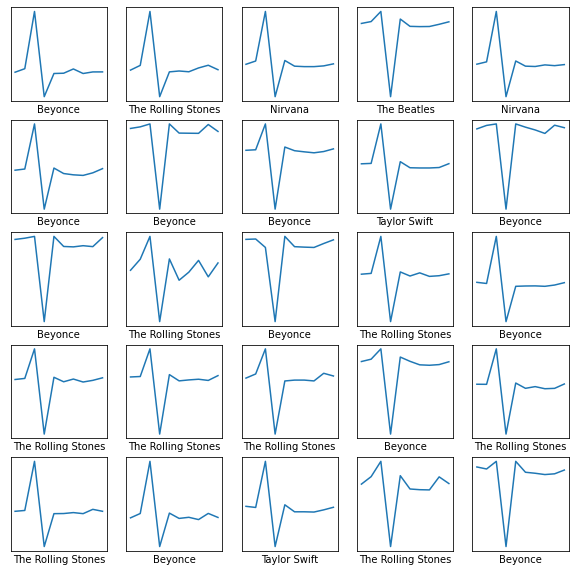

In [13]:
plt.figure(figsize=(10,10))
i=0
for feat, label in zip(train_features, train_labels):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.plot(feat)
    plt.xlabel(label_names[int(label)])
    i+=1
    if i >= 25:
        break
plt.show()

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

### Set up the layers

The basic building block of a neural network is the *layer*. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

In [16]:
input_shape = features[0].shape
print(input_shape)

(10,)


In [82]:
model = tf.keras.Sequential(
    [
    tf.keras.layers.Input(input_shape),
    tf.keras.layers.experimental.preprocessing.Normalization(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(len(label_names))]
    )

The network consists of a sequence of two `tf.keras.layers.Dense` layers. These are densely connected, or fully connected, neural layers. The first `Dense` layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 5. Each node contains a score that indicates the current image belongs to one of the 5 classes.

### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:

* *Loss function* —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* *Optimizer* —This is how the model is updated based on the data it sees and its loss function.
* *Metrics* —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [83]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [84]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_3 (Normalizati (None, 10)                21        
_________________________________________________________________
dense_6 (Dense)              (None, 128)               1408      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 645       
Total params: 2,074
Trainable params: 2,053
Non-trainable params: 21
_________________________________________________________________


## Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array.
4. Verify that the predictions match the labels from the `test_labels` array.


### Feed the model

To start training,  call the `model.fit` method—so called because it "fits" the model to the training data:

In [85]:
history = model.fit(
    x=train_features,
    y=train_labels,
    batch_size=16,
    validation_data=(test_features,test_labels),
    epochs=200,
    verbose=1,
    )

Epoch 1/200
98/98 [==============================] - 1s 4ms/step - loss: 1.8549 - accuracy: 0.2702 - val_loss: 1.3879 - val_accuracy: 0.3865
Epoch 2/200
98/98 [==============================] - 0s 2ms/step - loss: 1.5215 - accuracy: 0.3620 - val_loss: 1.3430 - val_accuracy: 0.4365
Epoch 3/200
98/98 [==============================] - 0s 2ms/step - loss: 1.4507 - accuracy: 0.3788 - val_loss: 1.2912 - val_accuracy: 0.4558
Epoch 4/200
98/98 [==============================] - 0s 2ms/step - loss: 1.4419 - accuracy: 0.3768 - val_loss: 1.2512 - val_accuracy: 0.5173
Epoch 5/200
98/98 [==============================] - 0s 2ms/step - loss: 1.3494 - accuracy: 0.4305 - val_loss: 1.2390 - val_accuracy: 0.4942
Epoch 6/200
98/98 [==============================] - 0s 2ms/step - loss: 1.2862 - accuracy: 0.4691 - val_loss: 1.1962 - val_accuracy: 0.5404
Epoch 7/200
98/98 [==============================] - 0s 2ms/step - loss: 1.2596 - accuracy: 0.4845 - val_loss: 1.1650 - val_accuracy: 0.5712
Epoch 8/200
9

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 80% on the training data.

### Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [23]:
dict.keys(history.history)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

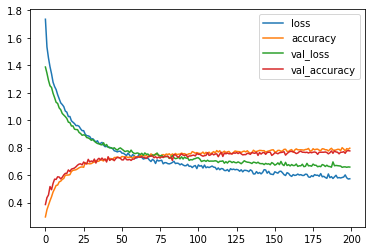

In [87]:
metrics = history.history
plt.plot(history.epoch, metrics['loss'])
plt.plot(history.epoch, metrics['accuracy'])
plt.plot(history.epoch, metrics['val_loss'])
plt.plot(history.epoch, metrics['val_accuracy'])
plt.legend(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
plt.show()

It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents *overfitting*. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data. 

One way to deal with this is by introducing some regularization with a [Dropout](https://jmlr.org/papers/volume15/srivastava14a.old/srivastava14a.pdf) layer. To do this, you need to go back to re-initialize the `Sequential` class with one layer being `tk.keras.layers.Dropout(0.2)`, where `0.2` is the amount of units in percentage to remove between layers. The more you take, the stronger the regularization.

### Make predictions

With the model trained, you can use it to make predictions about some images.
The model's linear outputs, [logits](https://developers.google.com/machine-learning/glossary#logits). Attach a softmax layer to convert the logits to probabilities, which are easier to interpret. 

In [88]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [89]:
predictions = probability_model.predict(test_features)

Here, the model has predicted the label for each artist in the testing set. Let's take a look at the first prediction:

In [65]:
predictions[0]

array([1.1181573e-02, 9.8401791e-01, 9.3440511e-05, 9.6941723e-05,
       4.6101473e-03], dtype=float32)

A prediction is an array of 5 numbers. They represent the model's "confidence" that the image corresponds to each of the 5 different articles of clothing. You can see which label has the highest confidence value:

In [66]:
np.argmax(predictions[0])

1

So, the model is most confident that this is artist `class_names[1]`. Examining the test label shows that this classification is correct:

In [67]:
test_labels[0]

1.0

## Confusion Matrix

In [90]:
pred_labels = np.array([np.argmax(p) for p in predictions])
pred_labels.shape, test_labels.shape

((520,), (520,))

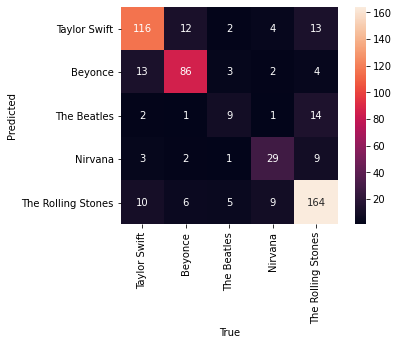

In [91]:
import seaborn as sns

mat = tf.math.confusion_matrix(test_labels, pred_labels)

sns.heatmap(mat, square=True, annot=True, cbar=True, fmt='d',
            xticklabels=label_names,
            yticklabels=label_names)

plt.xlabel('True')
plt.ylabel('Predicted');

## Use the trained model

Finally, use the trained model to make a prediction about a single image.

In [70]:
stats = []

In [106]:
# Grab a random element from the test dataset.
example = np.random.randint(len(test_features))

tester_feature = test_features[example]

# `tf.keras` models are optimized to make predictions on a *batch*, 
# or collection, of examples at once. Accordingly, even though 
# you're using a single image, you need to add it to a list:

# Add the image to a batch where it's the only member.
tester_feature = (np.expand_dims(tester_feature,0))


# Now predict the correct label for this image:
predictions_single = probability_model.predict(tester_feature)

y_pred = np.argmax(predictions_single[0])
y_true = int(test_labels[example])

# get both Predicted and True labels:

from termcolor import colored



if y_true != y_pred:
    stats.append(0)
    msg = f"Yikes!, {['Oh, well', 'perhaps next time?', 'ugh...'][np.random.randint(3)]}"
    color='red'
else:
    stats.append(1)
    msg = f"Knew it."
    color='green'

print(colored("="*80, color))
print(colored("| "+msg, color))
print(colored("-"*80, color))
print(colored("| TRUE: "+label_names[y_true], color))
print(colored("| PRED: "+label_names[y_pred], color))
print(colored("="*80, color))


print(f"Current accuracy: {stats.count(1) / len(stats) * 100}")
print(f"Actual accuracy is: {metrics['accuracy'][-1]*100}")


| Knew it.
--------------------------------------------------------------------------------
| TRUE: The Rolling Stones
| PRED: The Rolling Stones
Current accuracy: 76.92307692307693
Actual accuracy is: 79.67948913574219
